In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from IPython.core.display import display, HTML
import time

C:\Users\home\AppData\Local\Temp\ipykernel_11304\815816264.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [7]:
df_1 = pd.read_csv(r"C:\Users\home\Downloads\Pandas data sets\zomato_data.csv")
df_2 = pd.read_csv(r"C:\Users\home\Downloads\Pandas data sets\Geographical Coordinates.csv")

### 1. What is the shape of the given dataset?


In [8]:
# shape of dataset
df_1.shape

(51717, 10)

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


## Data Cleaning & Preprocessing

### Rate Column:

In [10]:
# Replacing '-' with NaN
df_1["rate"] = df_1["rate"].replace('-',np.nan)

In [11]:
# Removing /5 and reatining only the numeric value
df_1["rate"] = df_1["rate"].apply(lambda x:str(x).split("/")[0])

In [12]:
# Converting into float
df_1["rate"]=pd.to_numeric(df_1["rate"],errors="coerce")

In [13]:
df_1["rate"].dtype

dtype('float64')

In [14]:
# checking the number of null values
df_1["rate"].isna().sum()

10052

In [15]:
# filling the missing values using the median rating
df_1["rate"] = df_1["rate"].fillna(df_1["rate"].median())

In [16]:
df_1["rate"].isna().sum()

0

### Cost column

In [17]:
# Removing commas from numeric strings ('1,000' ---> '1000')
df_1["approx_costfor_two_people"] = df_1["approx_costfor_two_people"].apply(lambda x:str(x).replace(",",""))

In [18]:
# converting to numeric
df_1["approx_costfor_two_people"]=pd.to_numeric(df_1["approx_costfor_two_people"],errors="coerce")

In [19]:
df_1["approx_costfor_two_people"].dtype

dtype('float64')

In [20]:
# checking the number of null values
df_1["approx_costfor_two_people"].isna().sum()

346

In [21]:
# filling the missing values with median cost
df_1["approx_costfor_two_people"] = df_1["approx_costfor_two_people"].fillna(df_1["approx_costfor_two_people"].median())

In [22]:
df_1["approx_costfor_two_people"].isna().sum()

0

# Categorical Columns

In [23]:
# dish_liked → Replace NaN with "Not Available"
df_1["dish_liked"] = df_1["dish_liked"].fillna("Not Available")

In [24]:
df_1["dish_liked"].isna().sum()

0

In [25]:
# cuisines → Replace NaN with "Other"
df_1["cuisines"] = df_1["cuisines"].fillna("Other")

In [26]:
df_1["cuisines"].isna().sum()

0

In [27]:
# rest_type → Replace NaN with "Unknown"
df_1["rest_type"] = df_1["rest_type"].fillna("Unknown")

In [28]:
df_1["rest_type"].isna().sum()

0

### Votes Column

In [29]:
# filling the missing values with median
df_1["votes"] = df_1["votes"].fillna(df_1["votes"].median())

In [30]:
df_1["votes"].isna().sum()

0

### Binary Encoding

Yes --> 1\
No --> 0

In [31]:
df_1["online_order"] = df_1["online_order"].map({"Yes":1,"No":0})

In [32]:
df_1["online_order"].value_counts()

online_order
1    30444
0    21273
Name: count, dtype: int64

In [33]:
df_1["book_table"] = df_1["book_table"].map({"Yes":1,"No":0})

In [34]:
df_1["book_table"].value_counts()

book_table
0    45268
1     6449
Name: count, dtype: int64

### Data Type Conversion:

In [365]:
# rate → float
df_1["rate"] = df_1["rate"].astype("float")
df_1["rate"].dtype

dtype('float64')

In [366]:
# votes → integer
df_1["votes"] = df_1["votes"].astype("int")
df_1["votes"].dtype

dtype('int32')

In [367]:
# approx_costfor_two_people → integer
df_1["approx_costfor_two_people"] = df_1["approx_costfor_two_people"].astype("int")
df_1["approx_costfor_two_people"].dtype

dtype('int32')

### 2. How many restaurants serve North Indian cuisine?


In [368]:
df_nic = df_1[df_1["cuisines"].str.contains("North Indian",case=False)]

In [369]:
print("Number of restaurants serving North Indian Cuisine = ",df_nic.shape[0])

Number of restaurants serving North Indian Cuisine =  21085


### 3. What cuisine is most commonly offered by restaurants in Bangalore?

In [370]:
from collections import Counter
all_cuisines = ", ".join(df_1["cuisines"])
cuisine_counts = Counter(cuisine.strip() for cuisine in all_cuisines.split(","))
cuisine_counts.most_common(1)

[('North Indian', 21085)]

- North Indian cuisine is commonly offered by restaurants in Bangalore.

### 4. Which locality in Bangalore has the highest average cost for dining (for two people)?


In [371]:
avg_cost = df_1.groupby("listed_incity").agg({"approx_costfor_two_people":"mean"}).reset_index()

In [372]:
avg_cost=avg_cost.sort_values(by="approx_costfor_two_people",ascending=False)
avg_cost.head(1)

,listed_incity,approx_costfor_two_people
7,Church Street,770.361248


- Church Street has the highest average cost for dining (for two people).

### 5. Which restaurant type has the top rating with over 1000 votes?

In [373]:
top_rest = df_1["rest_type"].loc[(df_1["rate"]==df_1["rate"].max())&(df_1["votes"]==df_1["votes"].max())]

In [376]:
top_rest.head(1)

49170    Microbrewery
Name: rest_type, dtype: object

- Microbrewery has top rating with over 1000 votes.

### 6. How much does it cost at minimum to eat out in Bangalore?

In [174]:
df_1["approx_costfor_two_people"].min()

40

### 7. What percentage of total online orders is received by restaurants in Banashankari?

In [306]:
df_online = df_1[df_1["online_order"]==1]
df_Banashankari = df_online[df_online["listed_incity"]=="Banashankari"]

In [307]:
percentage = (df_Banashankari.shape[0]/df_online.shape[0])*100
percentage

1.7934568387859677

### 8. Which locality has the most restaurants with over 500 votes and a rating below 3.0?


In [377]:
rating_less_3 = df_1["listed_incity"].loc[(df_1["votes"]>500)&(df_1["rate"]<3.0)]
rating_less_3 = rating_less_3.value_counts().reset_index()
rating_less_3.head(1)

,listed_incity,count
0,Brookefield,8


- Brookefield has the most restaurants with over 500 votes and a rating below 3.0

### 9. Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?


In [378]:
df_1.groupby(["listed_incity","rest_type"]).agg({"rest_type":"count"})

rest_type
listed_incity rest_type                         
BTM           Bakery                          68
              Bakery, Beverage Shop            2
              Bakery, Cafe                     1
              Bakery, Dessert Parlor           7
              Bakery, Quick Bites             12
...                                          ...
Whitefield    Sweet Shop                      15
              Sweet Shop, Quick Bites          8
              Takeaway                         3
              Takeaway, Delivery             101
              Unknown                         12

[1515 rows x 1 columns]

### 10. What's the average cost difference between buffet and delivery restaurants?

In [379]:
df_type = df_1.groupby("listed_intype").agg({"approx_costfor_two_people":"mean"})

In [380]:
difference = df_type.loc["Buffet"]-df_type.loc["Delivery"]

In [381]:
print(f"The average cost difference between buffet and delivery restaurants = {difference["approx_costfor_two_people"]}")

The average cost difference between buffet and delivery restaurants = 831.2513659898209


### 11. What is the maximum number of votes received by any restaurant with online ordering?


In [382]:
df_online["votes"].max()

16832

### 12. What is the average rating of restaurants that serve both North Indian and Chinese cuisines?


In [383]:
df_nc = df_1[(df_1["cuisines"].str.contains("North Indian",case=False))&(df_1["cuisines"].str.contains("Chinese",case=False))]
print(f"Average rating of restaurants that serve both North Indian and Chinese cuisines = {np.round(df_nc["rate"].mean(),2)}")

Average rating of restaurants that serve both North Indian and Chinese cuisines = 3.59


### 13. What is the most profitable area for Zomato based on potential revenue estimation?


In [384]:
revenue = df_1.groupby("listed_incity").agg({"approx_costfor_two_people":"sum"})
revenue.loc[revenue["approx_costfor_two_people"]==revenue["approx_costfor_two_people"].max()]

,approx_costfor_two_people
listed_incity,
BTM,1623359


In [385]:
revenue.loc[["Brookefield","Koramangala 7th Block","Bellandur"]]

,approx_costfor_two_people
listed_incity,
Brookefield,791010
Koramangala 7th Block,1526330
Bellandur,675140


- BTM is not there in the options. After BTM Koramangala 7th Block has the highest revenue.

### 14. If Zomato wants to reduce customer complaints, which restaurant type should they focus on?


<Axes: xlabel='rest_type', ylabel='rate'>

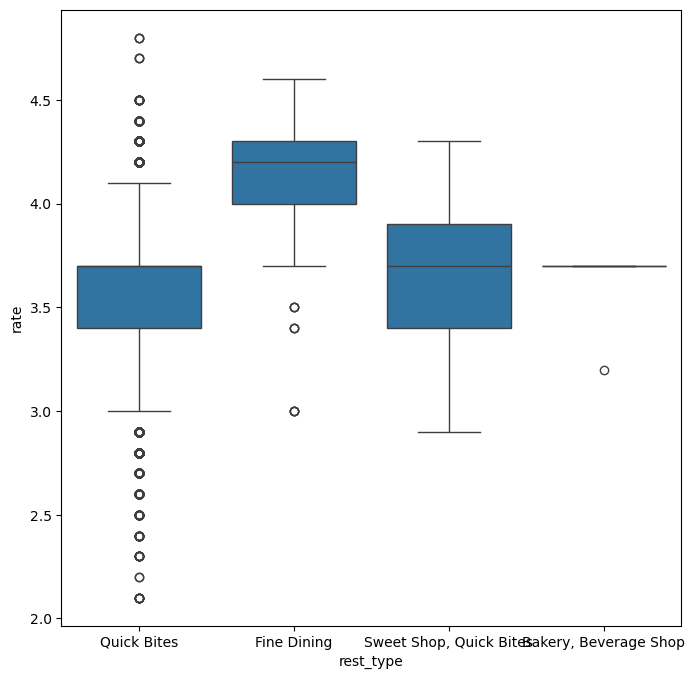

In [68]:
rest_types=["Bakery, Beverage Shop","Sweet Shop, Quick Bites","Quick Bites","Fine Dining"]
df_filtered = df_1[df_1["rest_type"].isin(rest_types)]

plt.figure(figsize=(8,8))
sns.boxplot(x=df_filtered["rest_type"],y=df_filtered["rate"])

- Among Bakery,Beverage Shop; 
Sweet Shop 
Quick Bit; Quick Bites; s
Fine Din; wngWe can see very low ratings for Quick Bites, so zomato should focus on it.

### 15. In which area should Zomato invest by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders?


In [387]:
sorted_df = df_1.loc[(df_1["rate"]>4.2)&(df_1["votes"]>500)&(df_1["online_order"]==1)]

In [388]:
sorted_df=sorted_df["listed_incity"].value_counts().sort_values(ascending=False)
sorted_df.head(1)

listed_incity
Koramangala 7th Block    97
Name: count, dtype: int64

- Zomato should invest in Koramangala 7th Block by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders because it has more number of restaurants.

In [389]:
!pip install folium

   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.9 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/110.9 kB 325.1 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.9 kB 737.3 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.9 kB 737.3 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.9 kB 737.3 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.9 kB 737.3 kB/s eta 0:00:01
   -------------------------------------- 110.9/110.9 kB 338.9 kB/s eta 0:00:00


In [390]:
!pip install IPython

In [2]:
from folium.plugins import MarkerCluster
import folium as folium
from IPython.display import IFrame

### Interactive Restaurant Density Mapping

In [35]:
merged_df = pd.merge(df_1,df_2,on="listed_incity",how="left")

In [36]:
map1 = folium.Map(location=[12.9716,77.5946],zoom_start=12)
marker_cluster = MarkerCluster().add_to(map1)

for i,row in merged_df.iterrows():
    if not pd.isna(row["Latitude"]) and not pd.isna(row["Longitude"]):
        folium.Marker(
            location=[row["Latitude"],row["Longitude"]],
            popup=f"{row["listed_incity"]}<br>Rating: {row["rate"]}<br>Cost: {row["approx_costfor_two_people"]}",
        ).add_to(marker_cluster)

map1.save("restaurant_density.html")

In [38]:
IFrame("restaurant_density.html",width=1000,height=800)

### Cuisine Specific Map

In [60]:
italian_df = merged_df[merged_df["cuisines"].str.contains("Italian",case=False)]
italian_df["Latitude"]=italian_df["Latitude"].fillna(italian_df["Latitude"].mean())
italian_df["Longitude"]=italian_df["Longitude"].fillna(italian_df["Longitude"].mean())

map2 = folium.Map(location=[12.9716,77.5946],zoom_start=12)
for i,row in italian_df.iterrows():
    folium.Marker(
        location=[row["Latitude"],row["Longitude"]],
        popup=f"{row["listed_incity"]}<br>Cuisine: {row["cuisines"]}",
        icom=folium.Icon(color="purple")
    ).add_to(map2)

map2.save("Italian_spots_map.html")

C:\Users\home\AppData\Local\Temp\ipykernel_11304\1438803572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italian_df["Latitude"]=italian_df["Latitude"].fillna(italian_df["Latitude"].mean())
C:\Users\home\AppData\Local\Temp\ipykernel_11304\1438803572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italian_df["Longitude"]=italian_df["Longitude"].fillna(italian_df["Longitude"].mean())


In [61]:
IFrame("Italian_spots_map.html",width=1000,height=800)